In [1]:
import re
import numpy as np
import pandas as pd
import seaborn as sns
import string
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from textblob import TextBlob
from nltk.sentiment import SentimentIntensityAnalyzer
import nltk

In [3]:
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, classification_report

In [5]:
twitter = pd.read_csv(r'C:\Users\k18at\Downloads\twitter_training.csv\twitter_training.csv')
twitter

\nTweet ID       entity sentiment  \
0            2401  Borderlands  Positive   
1            2401  Borderlands  Positive   
2            2401  Borderlands  Positive   
3            2401  Borderlands  Positive   
4            2401  Borderlands  Positive   
...           ...          ...       ...   
74677        9200       Nvidia  Positive   
74678        9200       Nvidia  Positive   
74679        9200       Nvidia  Positive   
74680        9200       Nvidia  Positive   
74681        9200       Nvidia  Positive   

                                           Tweet content  
0      im getting on borderlands and i will murder yo...  
1      I am coming to the borders and I will kill you...  
2      im getting on borderlands and i will kill you ...  
3      im coming on borderlands and i will murder you...  
4      im getting on borderlands 2 and i will murder ...  
...                                                  ...  
74677  Just realized that the Windows partition of my...  
74678  Just realized that my Mac window partition is ...  
74679  Just realized the windows partition of my Mac ...  
74680  Just realized between the windows partition of...  
74681  Just like the windows partition of my Mac is l...  

[74682 rows x 4 columns]

In [7]:
twitter.sample(5)

\nTweet ID        entity sentiment  \
59665        3427      Facebook   Neutral   
37812        5283   Hearthstone  Positive   
44690       11675       Verizon  Negative   
39100        5511   Hearthstone  Positive   
20813       12763  WorldOfCraft  Positive   

                                           Tweet content  
59665  If you're beautiful on Facebook and ugly in re...  
37812  So much fun in chat tonight. Special thanks to...  
44690  @ VerizonSupport @ Verizon @ VZWSupport I've b...  
39100  What a crazy day of Hearthstone. New arcade ca...  
20813                       I love Battle of Warcraft ;(

In [9]:
twitter.head()

\nTweet ID       entity sentiment  \
0        2401  Borderlands  Positive   
1        2401  Borderlands  Positive   
2        2401  Borderlands  Positive   
3        2401  Borderlands  Positive   
4        2401  Borderlands  Positive   

                                       Tweet content  
0  im getting on borderlands and i will murder yo...  
1  I am coming to the borders and I will kill you...  
2  im getting on borderlands and i will kill you ...  
3  im coming on borderlands and i will murder you...  
4  im getting on borderlands 2 and i will murder ...

In [11]:
twitter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74682 entries, 0 to 74681
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   
Tweet ID      74682 non-null  int64 
 1   entity         74682 non-null  object
 2   sentiment      74682 non-null  object
 3   Tweet content  73996 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.3+ MB


In [13]:
twitter.describe()

\nTweet ID
count  74682.000000
mean    6432.586165
std     3740.427870
min        1.000000
25%     3195.000000
50%     6422.000000
75%     9601.000000
max    13200.000000

In [15]:
twitter.isnull().sum()

\nTweet ID         0
entity             0
sentiment          0
Tweet content    686
dtype: int64

In [17]:
twitter.dropna(inplace=True)

In [19]:
twitter.isnull().sum()

\nTweet ID       0
entity           0
sentiment        0
Tweet content    0
dtype: int64

In [21]:
twitter.duplicated().sum()

2341

In [23]:
twitter = twitter.drop_duplicates().reset_index(drop=True)

In [25]:
twitter.duplicated().sum()

0

In [27]:
twitter.columns

Index(['\nTweet ID', 'entity', 'sentiment', 'Tweet content'], dtype='object')

In [29]:
print('length of data is', len(twitter))

length of data is 71655


In [31]:
twitter. shape

(71655, 4)

In [33]:
twitter['sentiment'].unique()

array(['Positive', 'Neutral', 'Negative', 'Irrelevant'], dtype=object)

[Text(0, 0, 'Negative'),
 Text(1, 0, 'Positive'),
 Text(2, 0, 'Neutral'),
 Text(3, 0, 'Irrelevant')]

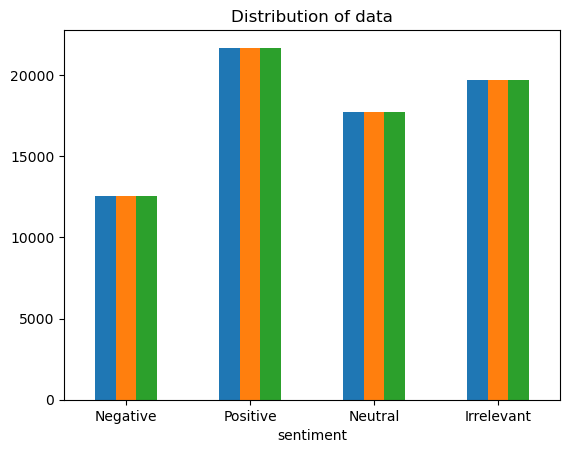

In [35]:
ax = twitter.groupby('sentiment').count().plot(kind='bar', title='Distribution of data',legend=False)
ax.set_xticklabels(['Negative','Positive','Neutral','Irrelevant'], rotation=0)

In [37]:
def clean_text(text):
    text = text.lower()
    text = re.sub(r'http\S+', '', text)
    text = re.sub(r'@\w+', '', text)
    text = re.sub(r'#\w+', '', text)
    text = re.sub(r'[^a-z\s]', '', text)
    text = text.strip()
    return text

In [39]:
twitter["Cleaned_Tweet"] = twitter["Tweet content"].astype(str).apply(clean_text)


In [41]:
twitter["Cleaned_Tweet"]

0        im getting on borderlands and i will murder yo...
1        i am coming to the borders and i will kill you...
2        im getting on borderlands and i will kill you all
3        im coming on borderlands and i will murder you...
4        im getting on borderlands  and i will murder y...
                               ...                        
71650    just realized that the windows partition of my...
71651    just realized that my mac window partition is ...
71652    just realized the windows partition of my mac ...
71653    just realized between the windows partition of...
71654    just like the windows partition of my mac is l...
Name: Cleaned_Tweet, Length: 71655, dtype: object

In [43]:
sia = SentimentIntensityAnalyzer()
twitter["VADER_Sentiment"] = twitter["Cleaned_Tweet"].apply(lambda x: sia.polarity_scores(x)['compound'])


In [45]:
def categorize_sentiment(score):
    if score >= 0.05:
        return "Positive"
    elif score <= -0.05:
        return "Negative"
    else:
        return "Neutral"

In [47]:
twitter["VADER_Label"] = twitter["VADER_Sentiment"].apply(categorize_sentiment)

C:\Users\k18at\AppData\Local\Temp\ipykernel_9588\692924349.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=twitter['VADER_Label'], palette='coolwarm')


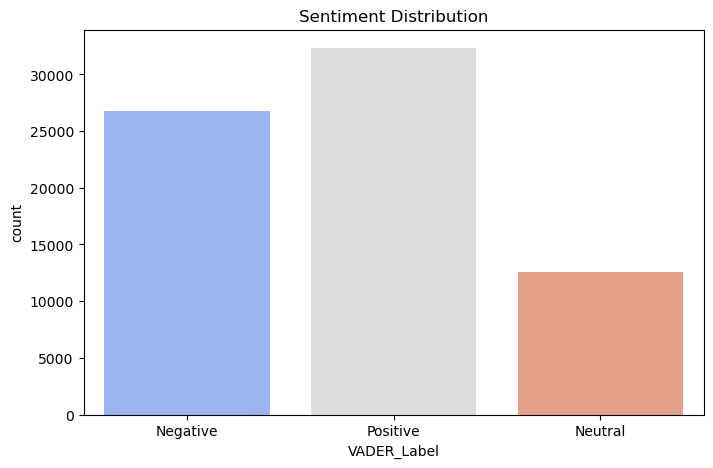

In [49]:
plt.figure(figsize=(8,5))
sns.countplot(x=twitter['VADER_Label'], palette='coolwarm')
plt.title("Sentiment Distribution")
plt.show()

In [51]:
positive_words = ' '.join(twitter[twitter['VADER_Label'] == 'Positive']['Cleaned_Tweet'])
negative_words = ' '.join(twitter[twitter['VADER_Label'] == 'Negative']['Cleaned_Tweet'])

In [53]:
positive_words

'so i spent a few hours making something for fun   if you dont know i am a huge  fan and maya is one of my favorite characters so i decided to make myself a wallpaper for my pc  here is the original image versus the creation i made  enjoy pictwittercommlsiwfjg so i spent a couple of hours doing something for fun if you dont know that im a huge  borderlands fan and maya is one of my favorite characters i decided to make a wallpaper for my pc heres the original picture compared to the creation i made have fun pictwittercom  mlsiwfjg so i spent a few hours doing something for fun if you dont know im a huge  borderlands fan and maya is one of my favorite characters so i spent a few hours making something for fun   if you dont know i am a huge rhandlerr fan and maya is one of my favorite characters so i decided to make myself a wallpaper for my pc  here is the original image versus the creation i made  enjoy pictwittercommlsiwfjg so i spent a few hours making something for fun   if you dont

In [55]:
negative_words

'im getting on borderlands and i will murder you all i am coming to the borders and i will kill you all im getting on borderlands and i will kill you all im coming on borderlands and i will murder you all im getting on borderlands  and i will murder you me all im getting into borderlands and i can murder you all that was the first borderlands session in a hot row where i actually had a really bad combat experience i did some really good kills the biggest dissappoinment in my life came out a year ago fuck borderlands the biggest disappointment of my life came a year ago the biggest dissappoinment in my life coming out a year ago fuck borderlands for the biggest male dissappoinment in my life came hanging out a year time ago fuck borderlands the biggest dissappoinment in my life came back last year ago fuck borderlands last man gearbox really needs to fix this dissapointing drops in the new borderlands  dlc cant be fine to farm bosses on mayhem  to get  legendary drop while anywhere else

Text(0.5, 1.0, 'Positive Tweets')

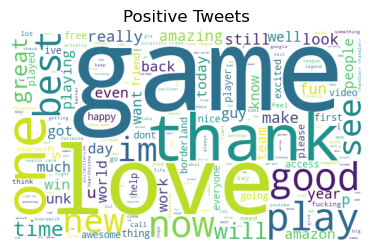

In [57]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.imshow(WordCloud(width=500, height=300, background_color='white').generate(positive_words))
plt.axis('off')
plt.title("Positive Tweets")

Text(0.5, 1.0, 'Negative Tweets')

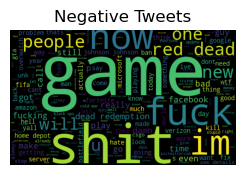

In [59]:
plt.subplot(1,2,2)
plt.imshow(WordCloud(width=500, height=300, background_color='black').generate(negative_words))
plt.axis('off')
plt.title("Negative Tweets")

In [61]:
twitter.to_csv("processed_twitter_sentiment.csv", index=False)